In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

In [2]:
data = pd.read_csv("filename.csv")
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1571672482255605760,1571668730475683840,2022-09-19 01:28:14 UTC,2022-09-19,01:28:14,0,1492258288372699140,aaron_evarts,Aaron Evarts,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'MnvlNoomi', 'name': 'Noomi 〽...",NaN,NaN,NaN,NaN
1,1571672478728196097,1571624938838302720,2022-09-19 01:28:13 UTC,2022-09-19,01:28:13,0,1912167830,khadijavaz,Edinéia Tavares Vaz,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'lesiavasylenko', 'name': 'Le...",NaN,NaN,NaN,NaN
2,1571672467634294784,1571672467634294784,2022-09-19 01:28:11 UTC,2022-09-19,01:28:11,0,35367443,marcywinograd,Marcy Winograd,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1571672466485022720,1571672466485022720,2022-09-19 01:28:10 UTC,2022-09-19,01:28:10,0,1151913018936053760,jacksonhinklle,Jackson Hinkle 🇺🇸,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1571672458171748352,1571535745898385409,2022-09-19 01:28:08 UTC,2022-09-19,01:28:08,0,1017933851056844800,mfmoneymitch,Mitch,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'ZhiYeC', 'name': '志强', 'id':...",NaN,NaN,NaN,NaN


In [3]:
data.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [5]:
data = data[["username", "tweet", "language"]]
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [6]:
data["language"].value_counts()

en     8891
pt      396
it      164
qme      73
es       71
in       65
und      42
ja       32
ru       29
qht      29
ca       28
fr       22
zh       20
th       18
vi       14
uk       13
fi       11
ro       10
de       10
tl        9
pl        8
hi        6
nl        6
qam       5
et        4
fa        3
lv        3
ar        3
hu        2
da        2
no        2
sv        2
ko        2
tr        2
cs        1
ur        1
kn        1
ta        1
cy        1
ne        1
ht        1
sr        1
Name: language, dtype: int64

In [7]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shin3\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


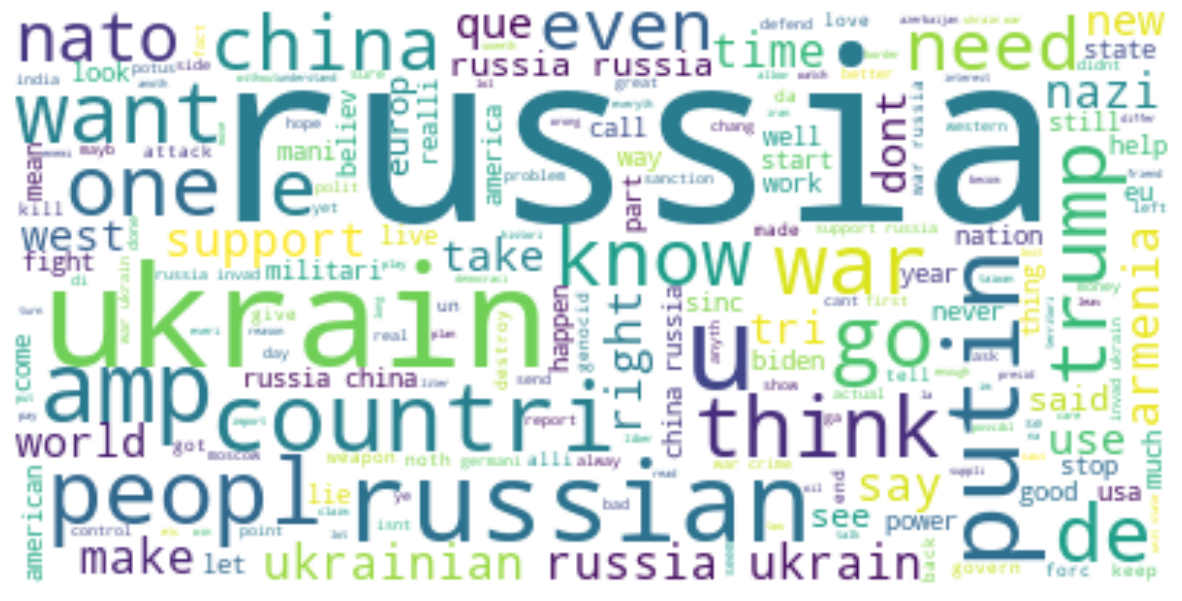

In [8]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]
data.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Shin3\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,tweet,Positive,Negative,Neutral
0,mnvlnoomi russia see declin popul war next ...,0.123,0.149,0.728
1,lesiavasylenko sinc russia began ruthless per...,0.000,0.317,0.683
2,poll peopl us oppos “send us troop ukrain ...,0.087,0.144,0.769
3,live pt putin launch kharkov counteroffens ru...,0.000,0.000,1.000
4,zhiyec fudigg emporiumfr pretti weird consid o...,0.000,0.296,0.704


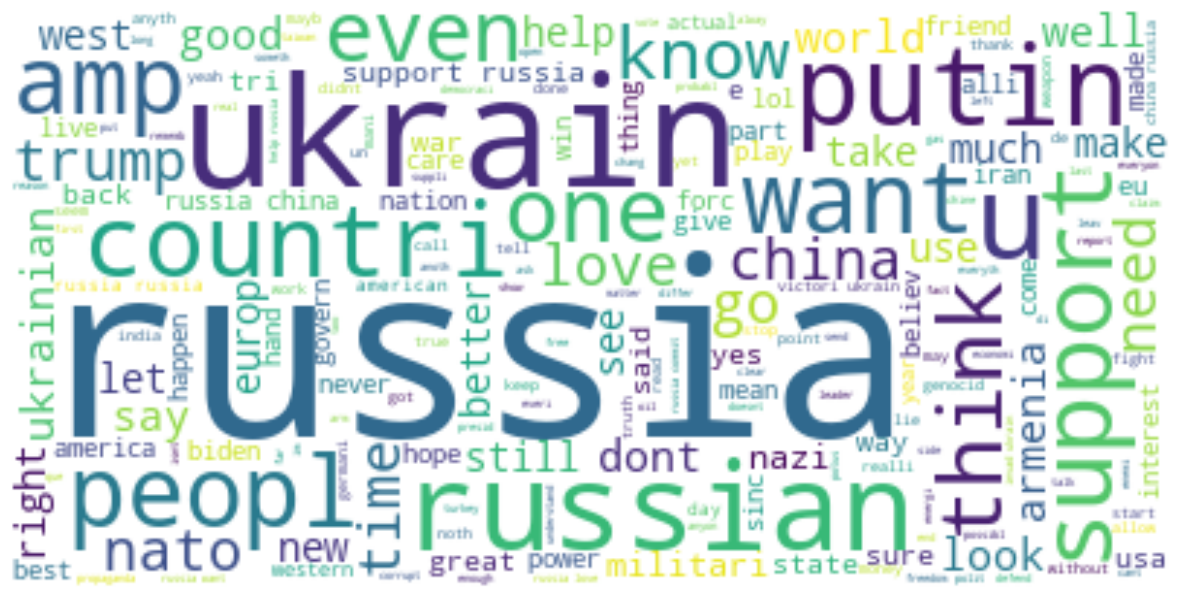

In [10]:
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

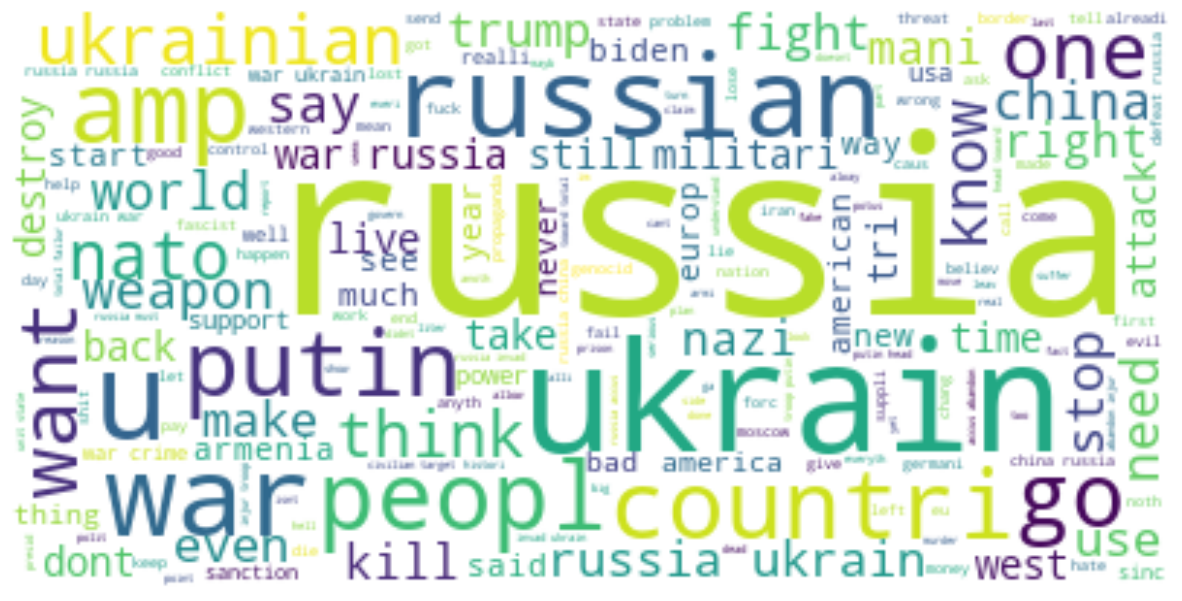

In [11]:
negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()